In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.


2025-03-24 18:24:42.998237: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-24 18:24:42.998522: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-24 18:24:42.998526: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-24 18:24:42.998576: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-24 18:24:42.998623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [5]:
cnn = tf.keras.models.load_model('Models/trained_plant_disease_model.keras')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


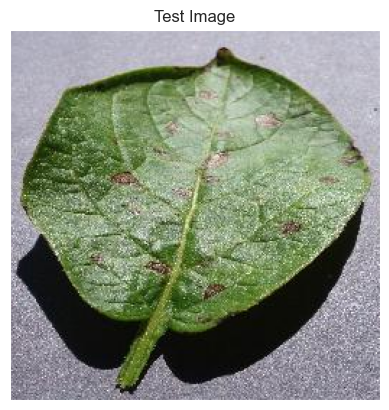

In [11]:
#Test Image Visualization
import cv2
image_path = 'test/PotatoEarlyBlight5.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [13]:
print(predictions)

[[8.2356715e-22 1.3884366e-15 3.6030977e-33 2.0548723e-32 5.1477088e-26
  3.9986850e-33 7.2605131e-26 6.3298742e-36 1.3362661e-14 0.0000000e+00
  8.3255702e-37 2.9657014e-35 2.7932722e-23 3.7895530e-31 1.4923881e-33
  0.0000000e+00 1.2381884e-38 0.0000000e+00 8.8296799e-24 1.1288291e-31
  1.0000000e+00 6.6797261e-25 1.1026879e-24 5.1268314e-36 1.9437063e-37
  8.9487829e-36 1.7184936e-27 9.9207958e-20 0.0000000e+00 1.3973052e-29
  4.6307462e-31 9.9641392e-29 1.1695054e-24 0.0000000e+00 2.3812375e-34
  0.0000000e+00 0.0000000e+00 3.2518748e-26]]


In [14]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


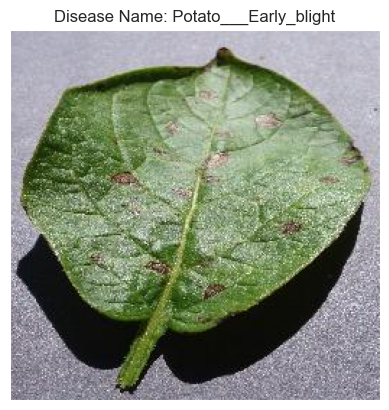

In [15]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()